Author: Jason Hart

In [ ]:
Professor: Abhineet Kulkarni
    

In [1]:
Date: 7/8/2022

# Analysing the housing data to Determine best upgrade for maximum sale value

## Introduction: We have home owners who are looking to make improvements to their house and are wondering what they should do for an improvement to maximise the overall sale price of the House.

### $H_{0}$ = There will be no change to house sale price with additions or upgrades
### $H_{1}$ = There will be an overall increase in sale price do to upgrades

Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set()
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
np.random.seed(0)

Reading in the King County data set

In [3]:

data = pd.read_csv('https://raw.githubusercontent.com/jaymhart76/dsc-phase-2-project-v2-3/main/data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data cleaning and normalization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Data appears to have some extreme outliers that may need to be filtered before we can build a normal regression


<AxesSubplot:>

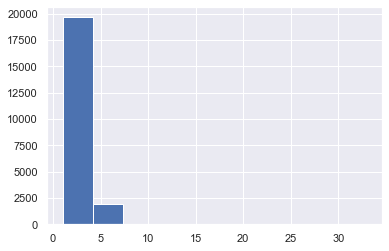

In [6]:
data['bedrooms'].hist()

Above we have a visualization of bedrooms that the houses contain, it shows that there are a lot of outliers that extend all the way out to the max of 33, but ther is a mean of 3.3

<AxesSubplot:>

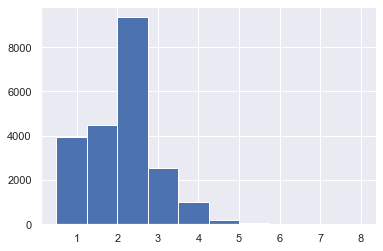

In [7]:
data['bathrooms'].hist()

Histogram of bathrooms again shows that there arre extreme outliers keeping the data from presenting a normal distribution

<AxesSubplot:>

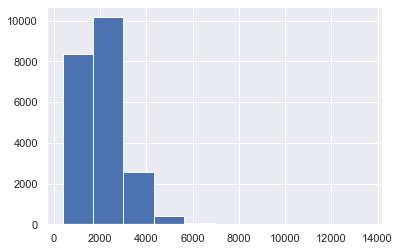

In [8]:
data['sqft_living'].hist()

Histogram for square foot living space shows extreme outliers over 5000 sq ft

Dropping outliers, expect minimal data loss

In [9]:
data_filtered = (
    data.loc[(data['bedrooms'] <= 5)
    & (data['bathrooms'] <= 4)
    & (data['sqft_living'] <= 5000)])

In [10]:
data.value_counts('bedrooms').sort_index()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

In [11]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20966 non-null  int64  
 1   date           20966 non-null  object 
 2   price          20966 non-null  float64
 3   bedrooms       20966 non-null  int64  
 4   bathrooms      20966 non-null  float64
 5   sqft_living    20966 non-null  int64  
 6   sqft_lot       20966 non-null  int64  
 7   floors         20966 non-null  float64
 8   waterfront     18669 non-null  object 
 9   view           20907 non-null  object 
 10  condition      20966 non-null  object 
 11  grade          20966 non-null  object 
 12  sqft_above     20966 non-null  int64  
 13  sqft_basement  20966 non-null  object 
 14  yr_built       20966 non-null  int64  
 15  yr_renovated   17226 non-null  float64
 16  zipcode        20966 non-null  int64  
 17  lat            20966 non-null  float64
 18  long  

Excluding houses with bathrooms > 4, bedrooms > 5 and sqft living > 5,000 sq ft.  Data loss is 3250 records or 15% of total records

<AxesSubplot:>

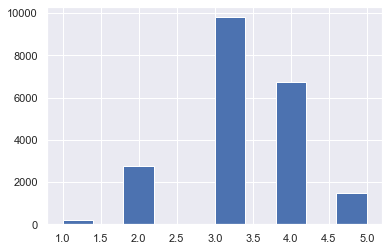

In [12]:
data_filtered['bedrooms'].hist()

bedrooms data is much more normalized now that we have filtered outliers

<AxesSubplot:>

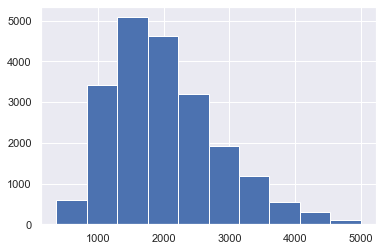

In [13]:
data_filtered['sqft_living'].hist()

sqft_living data still skewed, but too much filtering will limit our ability to predict price

In [128]:
data_filtered2 =data.loc[data['bathrooms'] <= 4]

<AxesSubplot:>

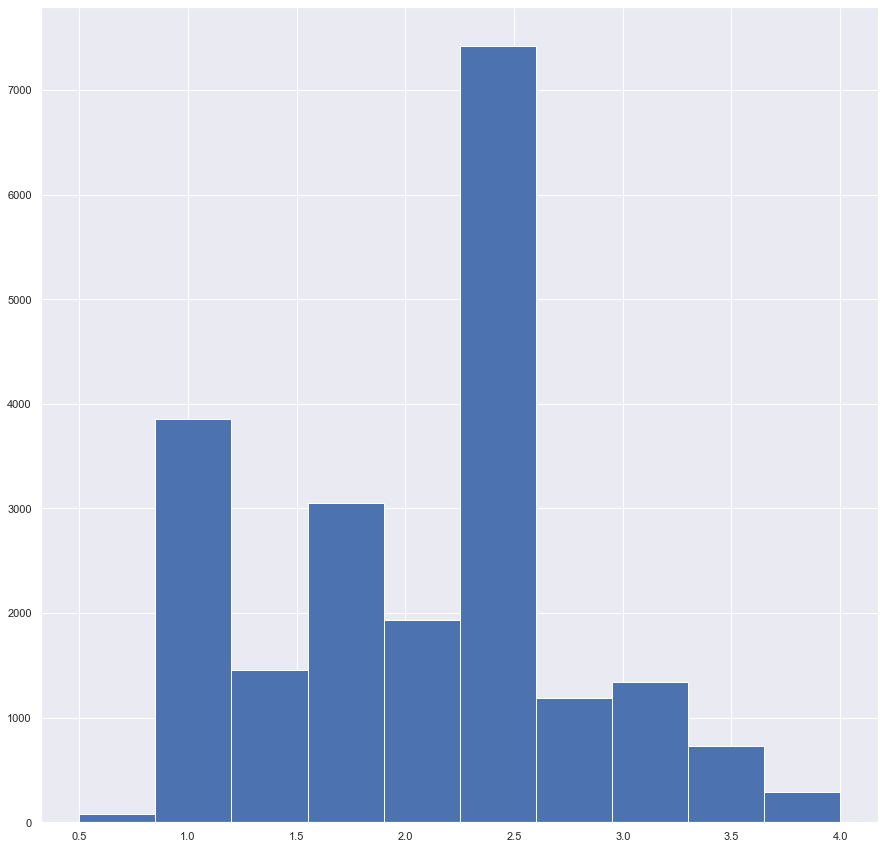

In [129]:
data_filtered2['bathrooms'].hist()

In [ ]:
Half bathrooms are causing the distribution to be very up and down, will try rounding

<AxesSubplot:>

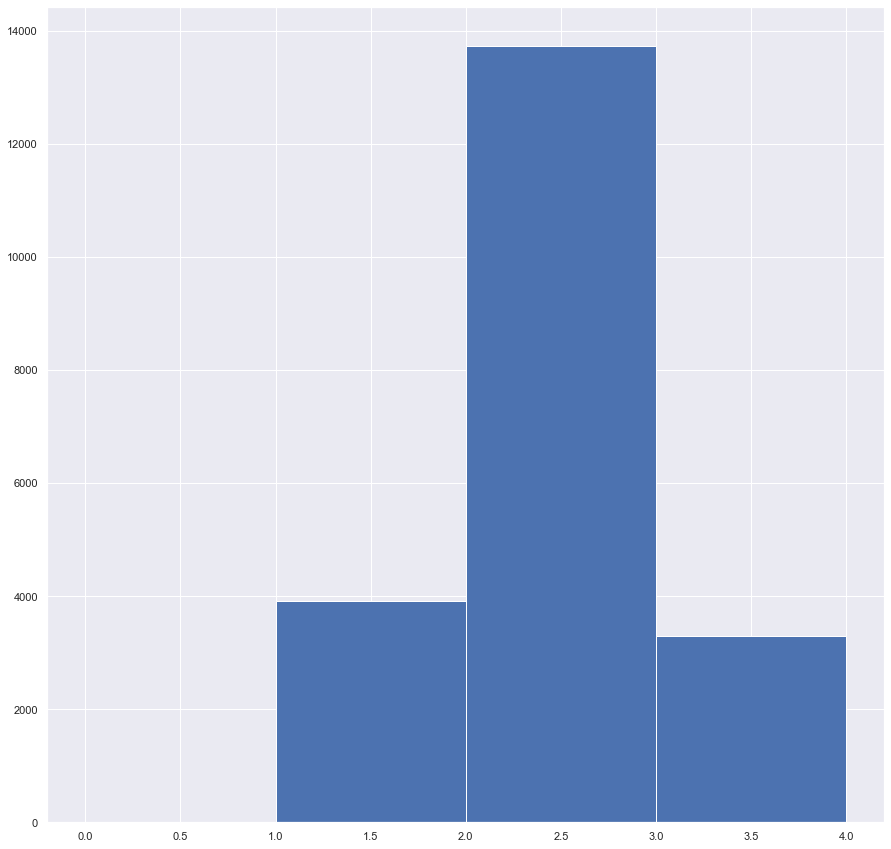

In [130]:
data_filtered['bathrooms'].round(0).hist(bins = 4)

Rounding normalized the data for bathrooms

In [17]:
data_filtered.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2297
view               59
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3740
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
data_filtered = data_filtered.drop(columns=['waterfront', 'yr_renovated'])

Dropping data where the majority of the data is null or nan

Creating a numerical data set for recursive feature ranking

In [19]:
numerical = data_filtered.select_dtypes(include= ['number'])

In [20]:
numerical.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,98074,47.6168,-122.045,1800,7503


Checking to see if there is a normal curve for price or if we need to transform that data as well

In [21]:
y = np.log(data_filtered['price'])

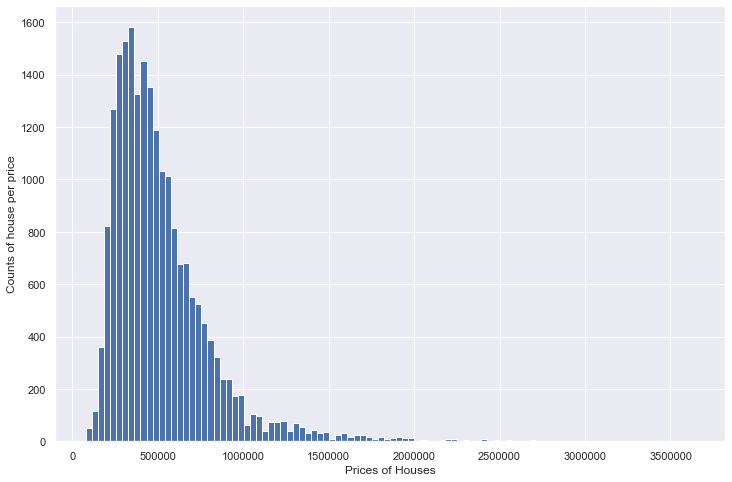

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(data_filtered['price'], bins=100)
plt.xlabel('Prices of Houses')
plt.ylabel('Counts of house per price')
plt.ticklabel_format(style='plain')
plt.show()

The raw price data is skewed and not a normal distribution

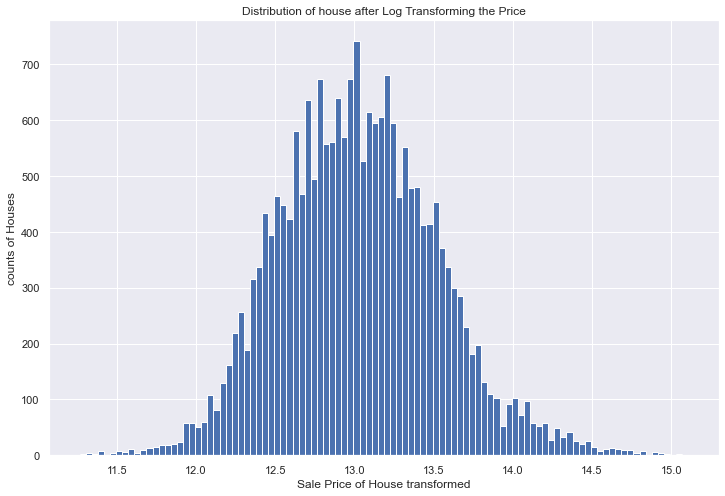

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(y, bins= 100)
plt.ticklabel_format(style='plain')
plt.xlabel('Sale Price of House transformed')
plt.ylabel('counts of Houses')
plt.title('Distribution of house after Log Transforming the Price')
plt.show()

In [ ]:
Utilizing a log transformation caused a normalization of the price data

## Data preperation and selection

### Running Recursive Feature Elimantion to determinin

In [24]:
X_rankings = numerical.drop(columns=['price', 'id'], axis = 1)

In [25]:
lr = LinearRegression()
select = RFE(lr, n_features_to_select=3)

In [26]:
ss = StandardScaler()
ss.fit(X_rankings)

StandardScaler()

In [27]:
X_scaled = ss.transform(X_rankings)

In [28]:
select.fit(X_scaled, y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [29]:
select.support_

array([False, False,  True, False, False, False, False, False,  True,
       False,  True, False])

In [30]:
select.ranking_

array([ 5,  2,  1,  8,  4,  9,  3,  7,  1,  6,  1, 10])

In [31]:
rf_df = (
    pd.DataFrame(select.ranking_,
    index=X_rankings.columns, 
    columns=['rank']).sort_values(by='rank')
)

In [32]:
rf_df

,rank
sqft_living,1
lat,1
sqft_living15,1
bathrooms,2
yr_built,3
floors,4
bedrooms,5
long,6
zipcode,7
sqft_lot,8


In [33]:
data.corr()['sqft_living']['sqft_living15']

0.7564015282474941

We are dropping the yr_built, lat, long and sqft_living15 because these are variables that are unchangeable for the homeowner.  With that information, our recursive feature elimation gives us a ranking of the top numerical variables to utilize: sqft_living, bathrooms and bedrooms will be our numerical variables for analysis

In [34]:
X_features = data_filtered[['bedrooms', 'bathrooms', 'sqft_living']]

In [35]:
ss.fit(X_features)
X_features_scaled = ss.transform(X_features)

In [36]:
X_features_scaled

array([[-0.37922635, -1.5175704 , -1.03614708],
       [-0.37922635,  0.25749744,  0.68728614],
       [-1.59718894, -1.5175704 , -1.54449788],
       ...,
       [-1.59718894, -1.87258396, -1.23452788],
       [-0.37922635,  0.61251101, -0.51539747],
       [-1.59718894, -1.87258396, -1.23452788]])

In [37]:
lr.fit(X_features_scaled, y)

LinearRegression()

In [38]:
lr.coef_

array([-0.05917729,  0.03583241,  0.34439636])

In [39]:
lr.coef_

array([-0.05917729,  0.03583241,  0.34439636])

In [40]:
lr.intercept_

13.025098274805153

In [41]:
reg_sum_numerical = (
    pd.DataFrame(['intercept', 'bedrooms', 'bathrooms', 'sqft_living'], 
    columns= ['Features'])
)
reg_sum_numerical['Weights'] = (
    lr.intercept_, 
    lr.coef_[0], 
    lr.coef_[1], 
    lr.coef_[2]
)

In [42]:
reg_sum_numerical.head()

,Features,Weights
0,intercept,13.025098
1,bedrooms,-0.059177
2,bathrooms,0.035832
3,sqft_living,0.344396


Checking the weights or coefficients for our numerical data set

In [43]:
data_predict_numerical = (
    data_filtered[['bedrooms', 'bathrooms', 'sqft_living']]
)
data_predict_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     20966 non-null  int64  
 1   bathrooms    20966 non-null  float64
 2   sqft_living  20966 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 655.2 KB


In [44]:
X_scaled

array([[-0.37922635, -1.5175704 , -1.03614708, ..., -0.30269438,
        -0.94946619, -0.26563982],
       [-0.37922635,  0.25749744,  0.68728614, ..., -0.74209737,
        -0.41488718, -0.1877862 ],
       [-1.59718894, -1.5175704 , -1.54449788, ..., -0.1326029 ,
         1.15830249, -0.1712291 ],
       ...,
       [-1.59718894, -1.87258396, -1.23452788, ..., -0.60035447,
        -1.43822415, -0.40823446],
       [-0.37922635,  0.61251101, -0.51539747, ...,  1.02968889,
        -0.84255039, -0.43641677],
       [-1.59718894, -1.87258396, -1.23452788, ..., -0.60035447,
        -1.43822415, -0.43367682]])

### Determination on which object data will be used

Figuring out which object data is relevant and will be used for further investigation

In [45]:
categorical = data_filtered.select_dtypes(include = ['object'])
categorical.head()

,date,view,condition,grade,sqft_basement
0,10/13/2014,NONE,Average,7 Average,0.0
1,12/9/2014,NONE,Average,7 Average,400.0
2,2/25/2015,NONE,Average,6 Low Average,0.0
3,12/9/2014,NONE,Very Good,7 Average,910.0
4,2/18/2015,NONE,Average,8 Good,0.0


In [46]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           20966 non-null  object
 1   view           20907 non-null  object
 2   condition      20966 non-null  object
 3   grade          20966 non-null  object
 4   sqft_basement  20966 non-null  object
dtypes: object(5)
memory usage: 982.8+ KB


In [47]:
categorical['view'].value_counts()

NONE         18993
AVERAGE        886
GOOD           455
FAIR           310
EXCELLENT      263
Name: view, dtype: int64

View has a majority of data missing in the form of the none category and will be dropped

In [48]:
categorical = categorical.drop('view', axis = 1)

In [49]:
categorical.head()

,date,condition,grade,sqft_basement
0,10/13/2014,Average,7 Average,0.0
1,12/9/2014,Average,7 Average,400.0
2,2/25/2015,Average,6 Low Average,0.0
3,12/9/2014,Very Good,7 Average,910.0
4,2/18/2015,Average,8 Good,0.0


In [50]:
categorical['sqft_basement'].value_counts()

0.0       12626
?           438
600.0       208
500.0       207
700.0       202
          ...  
1860.0        1
508.0         1
1548.0        1
602.0         1
652.0         1
Name: sqft_basement, Length: 271, dtype: int64

Majority of the homes have a zero basement status or a ? and increasing the basement size is not a feasable option for the home owner so it will be dropped

In [51]:
categorical.drop('sqft_basement', axis=1, inplace=True)

11,222 of the records for sqft_basement are 0 and therefore we are dropping the data, this is also coupled with the fact that the homeowner will not be able to add a basement, so there is no value added to the analysis

### Taking date information and grouping into seasons

Creating seasonal categories for the data to see if the season in which the house is sold will increase the sale price

In [53]:
data_filtered['date'] = pd.to_datetime(data_filtered['date'])

In [54]:
data_filtered['month']= pd.DatetimeIndex(data_filtered['date']).month

In [55]:
data_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2


In [56]:
def find_season(month):
    if month == 1 or month == 2 or month == 12:
        return 'Winter'
    elif month>= 3 and month<= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    else:
        return 'Fall'
        

In [57]:
data_filtered['season'] = data_filtered['month'].apply(find_season)

In [58]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20966 non-null  int64         
 1   date           20966 non-null  datetime64[ns]
 2   price          20966 non-null  float64       
 3   bedrooms       20966 non-null  int64         
 4   bathrooms      20966 non-null  float64       
 5   sqft_living    20966 non-null  int64         
 6   sqft_lot       20966 non-null  int64         
 7   floors         20966 non-null  float64       
 8   view           20907 non-null  object        
 9   condition      20966 non-null  object        
 10  grade          20966 non-null  object        
 11  sqft_above     20966 non-null  int64         
 12  sqft_basement  20966 non-null  object        
 13  yr_built       20966 non-null  int64         
 14  zipcode        20966 non-null  int64         
 15  lat            2096

In [59]:
data_filtered = (
    data_filtered
    [['price', 
      'bedrooms', 
      'bathrooms', 
      'sqft_living', 
      'condition', 
      'grade', 
      'season']]
)

creating a data set with our data for regression analysis, these were chosen do to their effect on the price and the home owners ability to upgrade or change these items

In [60]:
data_filtered.value_counts('grade')

grade
7 Average        8846
8 Good           5948
9 Better         2547
6 Low Average    2030
10 Very Good     1018
11 Excellent      267
5 Fair            239
12 Luxury          41
4 Low              27
13 Mansion          2
3 Poor              1
dtype: int64

In [61]:
data_filtered.value_counts('season')

season
Spring    6336
Summer    6149
Fall      4916
Winter    3565
dtype: int64

In [62]:
data_filtered.value_counts('condition')

condition
Average      13585
Good          5533
Very Good     1655
Fair           165
Poor            28
dtype: int64

In [ ]:
One hot encoding the categorical data for analysis

In [63]:
data_filtered_dummies = pd.get_dummies(data_filtered, columns=['condition', 'grade','season'])
data_filtered_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                20966 non-null  float64
 1   bedrooms             20966 non-null  int64  
 2   bathrooms            20966 non-null  float64
 3   sqft_living          20966 non-null  int64  
 4   condition_Average    20966 non-null  uint8  
 5   condition_Fair       20966 non-null  uint8  
 6   condition_Good       20966 non-null  uint8  
 7   condition_Poor       20966 non-null  uint8  
 8   condition_Very Good  20966 non-null  uint8  
 9   grade_10 Very Good   20966 non-null  uint8  
 10  grade_11 Excellent   20966 non-null  uint8  
 11  grade_12 Luxury      20966 non-null  uint8  
 12  grade_13 Mansion     20966 non-null  uint8  
 13  grade_3 Poor         20966 non-null  uint8  
 14  grade_4 Low          20966 non-null  uint8  
 15  grade_5 Fair         20966 non-null 

In [64]:
data_filtered_dummies.drop(
    ['condition_Fair', 
    'condition_Poor', 
    'grade_12 Luxury', 
    'grade_13 Mansion', 
    'grade_3 Poor', 
    'grade_4 Low', 
    'season_Winter'], 
    axis=1, 
    inplace=True)


Dropping categories based on value(amount of data in that category) and so that we do not run into the dummy trap

In [65]:
data_filtered_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20966 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                20966 non-null  float64
 1   bedrooms             20966 non-null  int64  
 2   bathrooms            20966 non-null  float64
 3   sqft_living          20966 non-null  int64  
 4   condition_Average    20966 non-null  uint8  
 5   condition_Good       20966 non-null  uint8  
 6   condition_Very Good  20966 non-null  uint8  
 7   grade_10 Very Good   20966 non-null  uint8  
 8   grade_11 Excellent   20966 non-null  uint8  
 9   grade_5 Fair         20966 non-null  uint8  
 10  grade_6 Low Average  20966 non-null  uint8  
 11  grade_7 Average      20966 non-null  uint8  
 12  grade_8 Good         20966 non-null  uint8  
 13  grade_9 Better       20966 non-null  uint8  
 14  season_Fall          20966 non-null  uint8  
 15  season_Spring        20966 non-null 

## Determining the Baseline model for prediction

In [66]:
data_predict = data_filtered[['bedrooms', 'bathrooms', 'sqft_living']]

In [67]:
data_predict.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


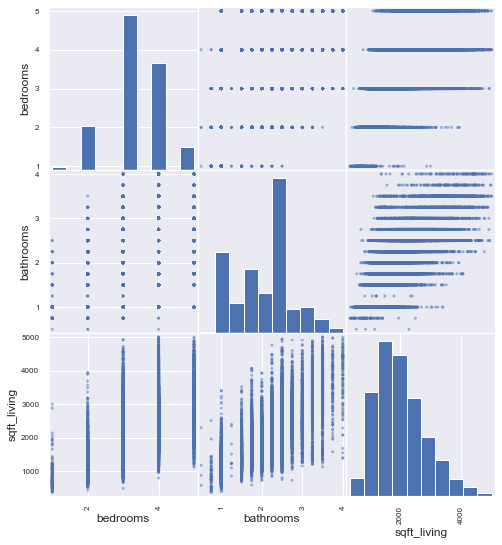

In [68]:
pd.plotting.scatter_matrix(data_predict, figsize = (8,9))
plt.show()

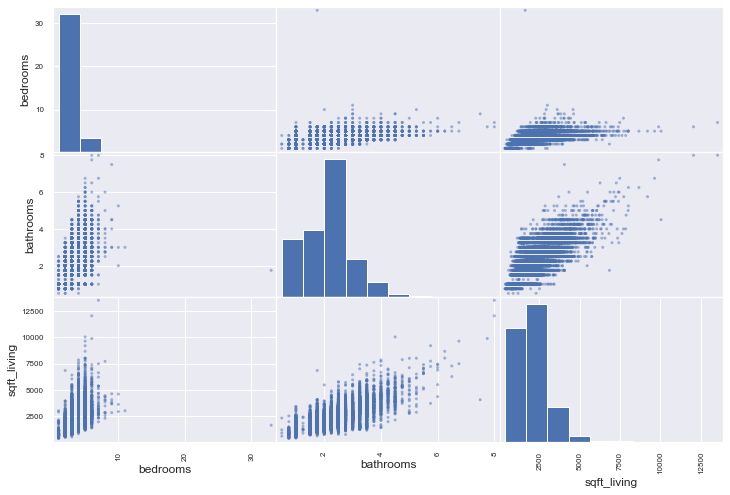

In [69]:
pd.plotting.scatter_matrix(data[['bedrooms', 'bathrooms', 'sqft_living']], figsize=(12,8))
plt.show()

Checking the linear relationships between data 

In [123]:
data.drop(['id', 'price'], axis=1).corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294
lat,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,-0.148370,0.032145,0.266742,1.000000,-0.135371,0.048679,-0.086139


<AxesSubplot:>

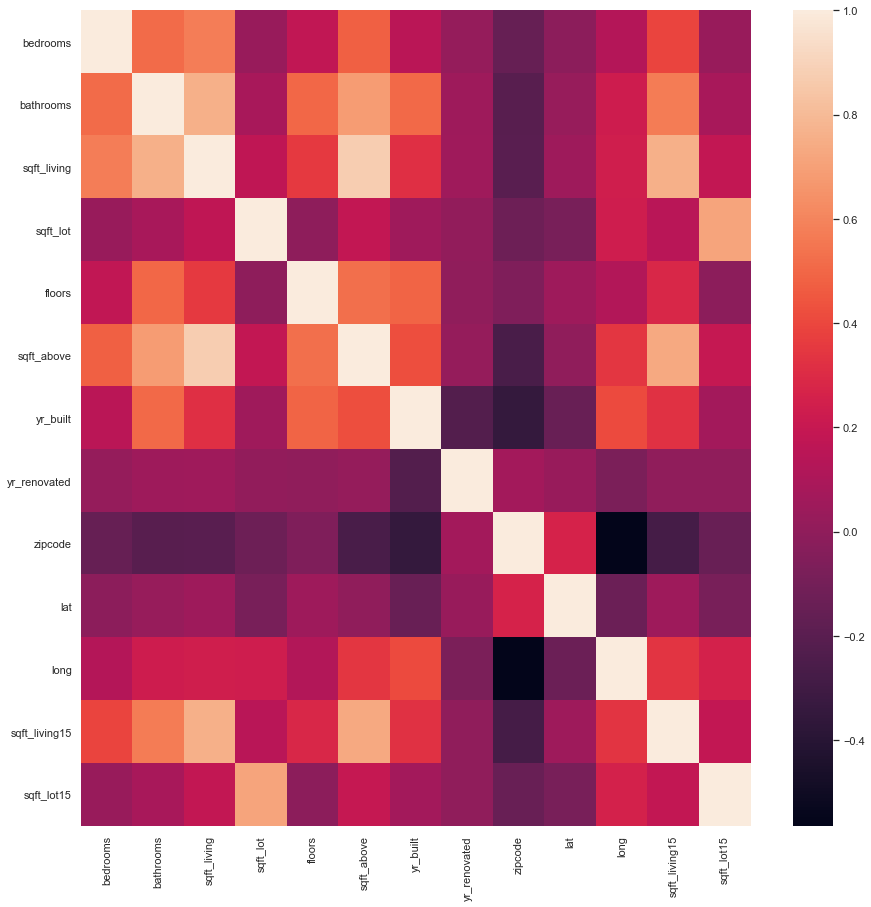

In [124]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data.drop(['price', 'id'], axis=1).corr())


In [71]:
data_filtered.corr()[['bedrooms', 'bathrooms', 'sqft_living']]

,bedrooms,bathrooms,sqft_living
price,0.297286,0.470084,0.653571
bedrooms,1.000000,0.504470,0.597504
bathrooms,0.504470,1.000000,0.725202
sqft_living,0.597504,0.725202,1.000000


Using correlation tables and heatmap to check correlation between variables

In [72]:
data_predict.corr()

,bedrooms,bathrooms,sqft_living
bedrooms,1.000000,0.504470,0.597504
bathrooms,0.504470,1.000000,0.725202
sqft_living,0.597504,0.725202,1.000000


In [73]:
abs(data_predict.corr())> 0.75

,bedrooms,bathrooms,sqft_living
bedrooms,True,False,False
bathrooms,False,True,False
sqft_living,False,False,True


In [74]:
df_corr = data_predict.corr().abs().stack().reset_index().sort_values(0, ascending=False)


In [75]:
df_corr['pairs']= list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace=True)
df_corr.drop(columns=['level_0', 'level_1'], inplace=True)
df_corr.columns=['cc']
df_corr.drop_duplicates(inplace=True)

In [76]:

df_corr.head()


,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(bathrooms, sqft_living)",0.725202
"(bedrooms, sqft_living)",0.597504
"(bedrooms, bathrooms)",0.504470


The three values are all strongly correlated, with bathrooms and sqft_living having the greatest correlation

All of our baseline variables are strongly correlated and will be effective variables in our regression analysis

### Running baseline OLS summary

In [77]:

def OLS_model(X, y):
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()
    print(results.summary())

In [78]:
X_base = data_filtered[['bedrooms', 'bathrooms', 'sqft_living']]
base_model = OLS_model(X_base, y)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     5815.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:                -8983.6
No. Observations:               20966   AIC:                         1.798e+04
Df Residuals:                   20962   BIC:                         1.801e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2978      0.011   1105.440      

### Running our base model with strictly the three numerical features only gives a us a R-squared of .454, which only explains 45.4% of the data

In [79]:
base_model_lg = LinearRegression()

In [80]:
splitter = ShuffleSplit(n_splits=3, test_size=.4, random_state=0)
base_model_scores = cross_validate(
    estimator=base_model_lg,
    X=X_base,
    y= y,
    return_train_score=True,
    cv=splitter
)
print("Train score:     ", base_model_scores["train_score"].mean())
print("Validation score:", base_model_scores["test_score"].mean())

Train score:      0.45382383884200167
Validation score: 0.4545152013611644


Train and validation score extremely close, so the data set is very 

Second model adding one hot encoded variables to see effect on model

In [81]:


second_model = OLS_model(data_filtered_dummies.drop('price', axis=1), y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1505.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:                -7311.2
No. Observations:               20966   AIC:                         1.466e+04
Df Residuals:                   20949   BIC:                         1.479e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.6853    

In [82]:

X_first_model =data_filtered_dummies.drop('price', axis = 1)
X_train_first, X_test_first, y_train_first, y_test_first = (
    train_test_split(X_first_model, y , test_size = .4, random_state=0))

In [83]:
first_model = LinearRegression().fit(X_train_first, y_train_first)
first_model.score(X_train_first, y_train_first)

0.5319858026052593

In [84]:
first_model.score(X_test_first, y_test_first)

0.5382201118049803

Running test train split shows us that the data is consistent since the difference in scores is .005, with the mean being the R-squared from our OLS summary

In [85]:
cross_val_score(first_model, X_first_model, y)

array([0.52348489, 0.52628423, 0.52521973, 0.52842422, 0.56231074])

In [86]:
cross_val_score(first_model, X_first_model, y, scoring='neg_mean_squared_error')

array([-0.12315751, -0.12037601, -0.11835015, -0.12557283, -0.10171944])

In [87]:
X_grade_condition = (
    data_filtered_dummies.iloc[:,~data_filtered_dummies.columns
                               .str.contains('season|price')]
)
third_model = OLS_model(X_grade_condition, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1835.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:                -7362.4
No. Observations:               20966   AIC:                         1.475e+04
Df Residuals:                   20952   BIC:                         1.486e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.7105    

In [88]:
third_model_lg = LinearRegression()
third_model_scores = cross_validate(
    estimator=third_model_lg,
    X=X_grade_condition,
    y= y,
    return_train_score=True,
    cv=splitter
)
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())

Train score:      0.53230949169437
Validation score: 0.5320677505260473


In [89]:
X_grade = (
    data_filtered_dummies.loc[:,~data_filtered_dummies.columns.str.
    contains('season|condition')].drop('price', axis=1)
)

In [90]:
fourth_model = OLS_model(X_grade, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2223.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:                -7751.8
No. Observations:               20966   AIC:                         1.553e+04
Df Residuals:                   20955   BIC:                         1.561e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.8296    

In [91]:
fourth_model_lg = LinearRegression()
fouth_model_scores = cross_validate(
    estimator=fourth_model_lg,
    X=X_grade,
    y= y,
    return_train_score=True,
    cv=splitter
)
print("Train score:     ", base_model_scores["train_score"].mean())
print("Validation score:", base_model_scores["test_score"].mean())

Train score:      0.45382383884200167
Validation score: 0.4545152013611644


Model choosen is the third model, although there is a model with a higher R-squared, it causes the p-value of bathrooms, which is one of our features and part of our Hypothesis to increase to .247 and thus in that model the bathrooms would be procluded from the results, due to multicollinearity

## Checking and Interpretting the final model

### 

In [92]:
final_model_reg = linear_model.LinearRegression()

In [93]:
X_final_model = ss.fit_transform(X_grade_condition)
X_train_final, X_test_final, y_train_final, y_test_final = (
    train_test_split(X_grade_condition, y, test_size=.3, random_state = 0))

In [94]:
final_model_reg.fit(X_grade_condition, y)
y_pred = final_model_reg.predict(X_train_final)

In [95]:
print("R-squared: {}".format(r2_score(y_true=y_train_final, y_pred=y_pred)))

R-squared: 0.5303538121415552


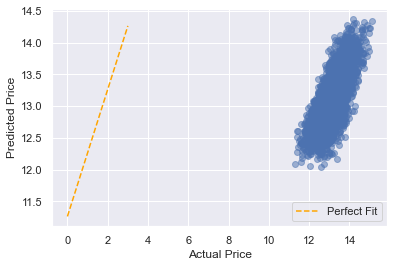

In [96]:
preds = final_model_reg.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_train_final.min(), y_train_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [97]:
y_test_final

8493     12.428816
18666    12.495004
16990    13.363111
449      13.161584
3853     13.171154
           ...    
20575    12.519057
20441    13.764217
10967    14.260196
19782    12.868413
17311    13.513053
Name: price, Length: 6290, dtype: float64

In [98]:
preds.mean()

13.025610737778655

In [99]:
final_model_resid = y_train_final.values-y_pred
mean_resid = np.mean(final_model_resid)
print("Mean of residuals: {}".format(mean_resid))

Mean of residuals: -0.0019518781112530296


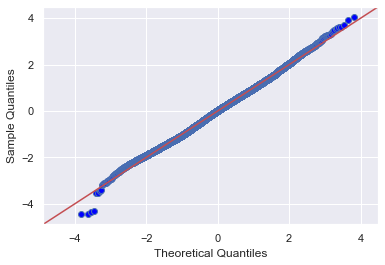

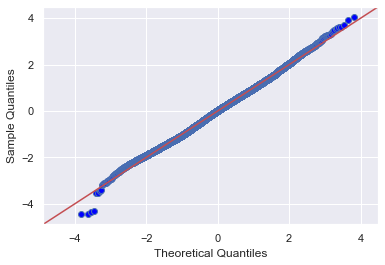

In [100]:
residuals =(y_train_final-y_pred)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

We do have a few outliers, but they do not appear to create too much of a normality issue

In [101]:
len(residuals
   )

14676

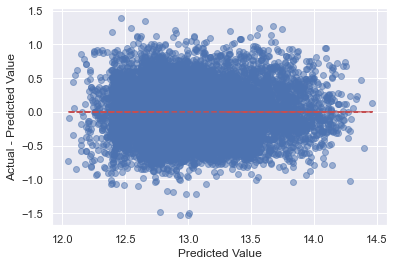

In [102]:
fig, ax = plt.subplots()

ax.scatter(y_pred, residuals, alpha=0.5)
ax.plot(y_pred, [0 for i in range(len(X_train_final))],'--r')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

We do not appear to have an issue with Homoscedasticity

In [103]:
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms               29.572074
bathrooms              23.515184
sqft_living            26.603297
condition_Average      56.356675
condition_Good         23.414634
condition_Very Good     7.882066
grade_10 Very Good      6.250672
grade_11 Excellent      2.494898
grade_5 Fair            1.847970
grade_6 Low Average     9.069381
grade_7 Average        39.319060
grade_8 Good           28.767382
grade_9 Better         13.036745
Name: Variance Inflation Factor, dtype: float64

It appears that with this many items over a value of 5, that we have a severe issue with multicollinearity, but these factors are intermingled so that is to be expected

# Data Visulaization

In [104]:
def reg_plot(data_vis):
    sns.regplot(
    x=data_vis,
    y = 'price',
    data = data_filtered,
    scatter_kws={'color':'black'},
    line_kws={'color':'red'}
)
    plt.ylabel('Selling Price')
    plt.ticklabel_format(style='plain')


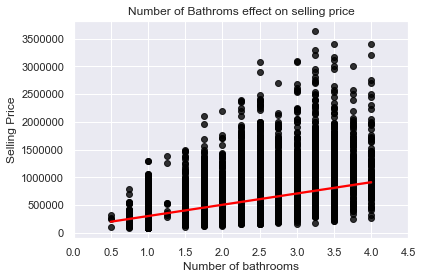

In [105]:
reg_plot(data_filtered['bathrooms'])
plt.xlabel('Number of bathrooms')
plt.title('Number of Bathroms effect on selling price')
plt.xlim(0,4.5)
plt.show()

Shows the slope of the regression for number of bathrooms

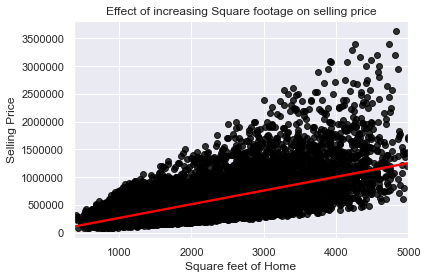

In [106]:
reg_plot(data_filtered['sqft_living'])
plt.xlabel('Square feet of Home')
plt.title('Effect of increasing Square footage on selling price')

plt.show()

Shows the effect of sqft_living on the price, but also shows a funnel shape which may violate regression conditions

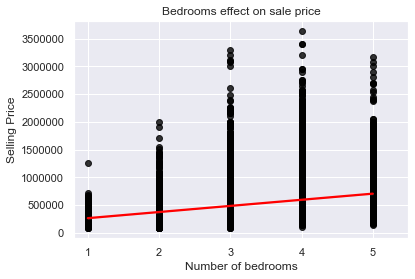

In [107]:
reg_plot(data_filtered['bedrooms'])
plt.xlabel('Number of bedrooms')
plt.title('Bedrooms effect on sale price')
plt.xlim(.8,5.5)
plt.show()

(0.5, 5.5)

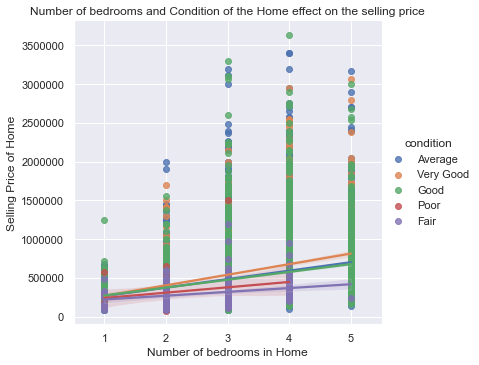

In [108]:
sns.lmplot(data=data_filtered, x='bedrooms', y = 'price', hue = 'condition')
plt.ticklabel_format(style="plain")
plt.ylabel('Selling Price of Home')
plt.xlabel('Number of bedrooms in Home')
plt.title("Number of bedrooms and Condition of the Home effect on the selling price")
plt.xlim(.5,5.5)

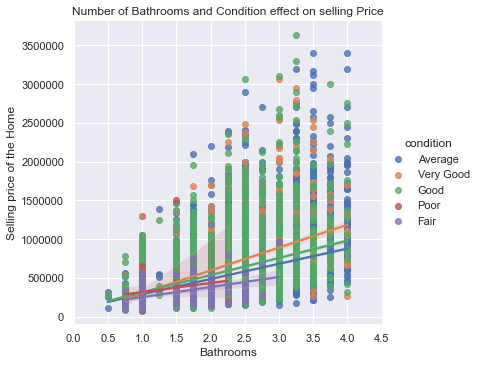

In [109]:
sns.lmplot(data=data_filtered, x='bathrooms', y = 'price', hue = 'condition')
plt.ticklabel_format(style='plain')
plt.ylabel('Selling price of the Home')
plt.xlabel('Bathrooms')
plt.title("Number of Bathrooms and Condition effect on selling Price")
plt.xlim(0, 4.5)
plt.show()

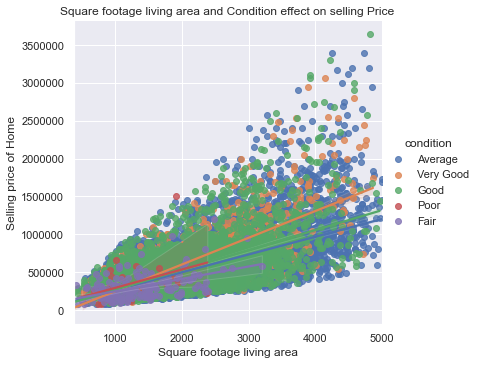

In [110]:
sns.lmplot(data=data_filtered, x ='sqft_living', y = 'price', hue= 'condition')
plt.ticklabel_format(style='plain')
plt.xlabel('Square footage living area')
plt.ylabel('Selling price of Home')
plt.title("Square footage living area and Condition effect on selling Price")
plt.show()

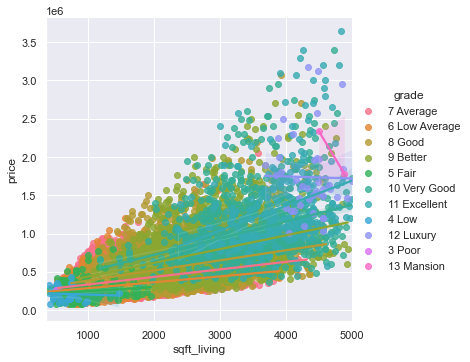

In [111]:
sns.lmplot(data=data_filtered, x='sqft_living', y = 'price', hue = 'grade')


Funnel shape is one of the reasons we did not consider the sqft_living as the best factor

# Conclusion


In conclusion, adding a bedroom, bathroom or square footage to the living area will not deliver the greatest return is sale price, increasing the condition of the homw will give greatest increase in sale value.  With a 13% increase for average condition, 21% increase in value for Good and a 35% increase for very good.  We were able to have a descriptive quality of describing 53.2% of possible errors in the equation and we eliminated any variables from consideration with a p- value greater than .05.

We ruled out certain variables in this analysis due to the fact that they would be unchangable by the home owner who was attempting to sell the home, but in the future if we were to revist this data for a house flipper or a real estat agency, we would investigate sqft_living15 and the location of the home as this would give us a starting point as to where we could look to purchase a home and remodel for the greatest increased sale price.